# The algorithm tries to do binary classification by random guessing weights and bias. It returns the best guess

### Crete test set using `make_blobs` function of `scikit-learn`

In [56]:
from sklearn.datasets import make_blobs

In [65]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2)
y[y == 0] = -1 # use +-1 labels


### Visualize test set

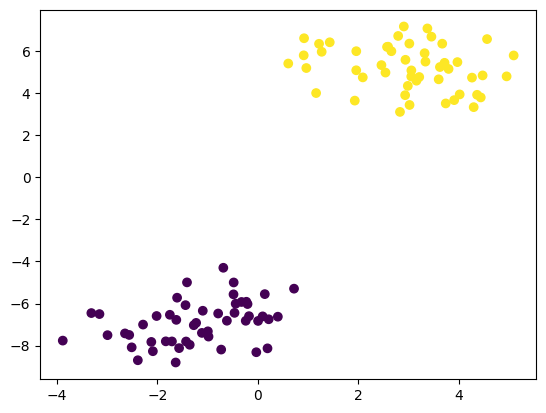

In [66]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

### Create random linear classifier

In [60]:
import numpy as np

In [68]:
def random_linear_classifier(X, y, k):
  '''
  X (n by d array): coordinates of points id d-dimensional space
  y (1 d array): labels of the data (either +1 or -1)
  k (int): number of guesses

  returns:
    th (1 by d array): best set of weights
    th0 (float): best bias
    accuracy (float): best accuracy
  '''
  # randomly pick d weights in range (-5, 5), does this k times
  th = 5.0 * (np.random.uniform(size = (k, X.shape[1])) - 0.5)
  # do the same with the bias
  th0 = 5.0* (np.random.uniform(size = (k,1)) - 0.5) * np.ones(shape = (k, X.shape[0]))

  # calculate the predictions (signed distance of each point to hyperplane)
  predictions = np.sign(np.dot(th, X.T) + th0)

  # reshape y if needed (y should be of shape (n, 1))
  if y.ndim == 1:
    y = y.reshape(-1,1)

  # calculate the accuracy of predictions
  accuracy = np.sum(predictions == y.T, axis = 1)/len(y)

  # pick the best guess
  best_index = np.argmax(accuracy)
  best_accuracy = accuracy[best_index]
  best_weights = th[best_index, :]
  best_bias = th0[best_index, 0]

  return (best_weights, best_bias, best_accuracy)





In [69]:
weights, bias, accuracy = random_linear_classifier(X, y, 20)

In [70]:
print(f'Best weights: {weights}. Best bias: {bias}. Best accuracy: {accuracy}')

Best weights: [-0.5230918   2.45139582]. Best bias: 1.3814884149418378. Best accuracy: 1.0


# Plot the decision boundary for d = 2

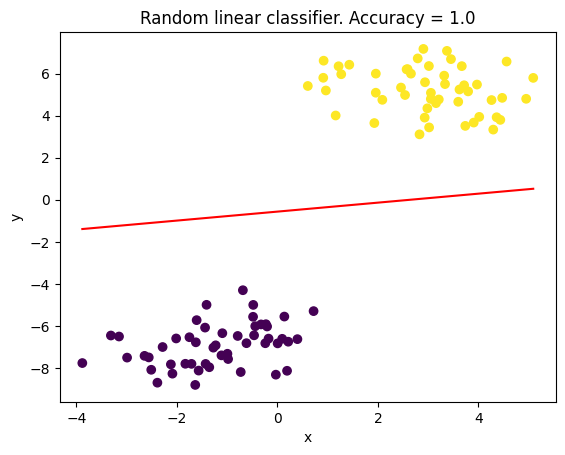

In [72]:
x_min = X[:,0].min()
x_max = X[:,0].max()

x_linear = np.linspace(x_min, x_max, 500)
y_linear = - (weights[0]/weights[1]) * x_linear - bias/weights[1]

plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x_linear, y_linear, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Random linear classifier. Accuracy = {accuracy}")
plt.show()